## Import element information from pymatgen

In [1]:
from pymatgen import Element
symbol = "Fe"
el = Element(symbol)
elec_structure = el.full_electronic_structure
#print("HELLO 1")

## Plotting the electronic structure

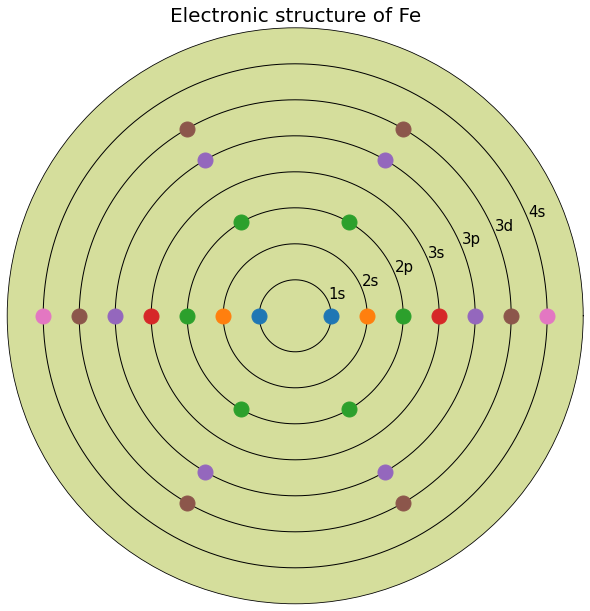

In [2]:
%matplotlib inline

from matplotlib.pyplot import figure, show, rc, grid
rc('grid', color='#316931', linewidth=0, linestyle='-')
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
import numpy as np
# make a square figure
fig = figure(figsize=(10, 10))

# AJP CHANGE
# The line of code below does not work in Python 3
# https://stackoverflow.com/questions/50504053/attributeerror-unknown-property-axisbg
# replacing "axisbg" with "facecolor"

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='#d5de9c')

rticks = []
rlabels = []
for i, shell in enumerate(elec_structure):
    #Draw the shell
    r = 0.5 * (i + 1)
    rad = [r] * 1000
    # AJP replaced xrange() with range()
    theta = [2 * np.pi * j / 1000 for j in range(1000)]
    ax.plot(theta, rad, 'k-', lw=1)
    #Draw the electrons
    rad = [r] * shell[2]
    
    # AJP CHANGED
    # In Python 3, it's range() instead of xrange
    # https://stackoverflow.com/questions/17192158/nameerror-global-name-xrange-is-not-defined-in-python-3
    theta = [2 * np.pi * j / shell[2] for j in range(shell[2])]
    ax.plot(theta, rad, 'o', markersize=15)
    rticks.append(r)
    rlabels.append("{}{}".format(shell[0], shell[1]))

ax.set_rmax(r + 0.5)

ax.set_thetagrids([0, 90, 180, 270], [""]*4, color='k')
ax.set_rgrids(rticks, rlabels)
ax.set_title("Electronic structure of {}".format(symbol), fontsize=20)
grid(True)
show()